In [4]:
from copy import deepcopy
import numpy as np
import IPython.display
import time
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os

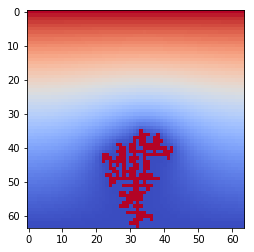

In [55]:
#sequential dla
n = 64
iters = 50
source = [(0, i) for i in range(n)]
objects = [(n-1, int(n/2))]
omega = 1.9
tol = 1e-3

C = [[0]*n for _ in range(n)]
for i,j in source:
    C[i][j] = 1
Cm = deepcopy(C)

for k in range(iters):
    while True:
        alpha = 0
        for r in range(2):
            for i in range(n):
                if i == 0 or i == n-1:
                    continue
                for j in range(n):
                    if (i + j) % 2 == r:
                        continue
                    if (i, j) in objects:
                        C[i][j] = 0
                        continue
                    #C[i][j] = (omega/4)*(C[i+1][j] + C[i-1][j] + C[i][j+1] + C[i][j-1]) + (1-omega)*C[i][j]
                    if i == 0 and j == 0:
                        C[i][j] = (omega/4)*(C[i+1][j] + C[i][j+1] + C[i][n-1]) + (1-omega)*C[i][j]
                    elif i == 0 and j == n-1:
                        C[i][j] = (omega/4)*(C[i+1][j] + C[i][j-1] + C[i][0]) + (1-omega)*C[i][j]
                    elif i == n-1 and j == 0:
                        C[i][j] = (omega/4)*(C[i-1][j] + C[i][j+1] + C[i][n-1]) + (1-omega)*C[i][j]
                    elif i == n-1 and j == n-1:
                        C[i][j] = (omega/4)*(C[i-1][j] + C[i][j-1] + C[i][0]) + (1-omega)*C[i][j]
                    elif i == 0 and j != 0:
                        C[i][j] = (omega/4)*(C[i+1][j] + C[i][j+1] + C[i][j-1]) + (1-omega)*C[i][j]
                    elif i !=0 and j == 0:
                        C[i][j] = (omega/4)*(C[i+1][j] + C[i-1][j] + C[i][j+1] + C[i][n-1]) + (1-omega)*C[i][j]
                    elif i !=0 and j == n-1:
                        C[i][j] = (omega/4)*(C[i+1][j] + C[i-1][j] + C[i][j-1] + C[i][0]) + (1-omega)*C[i][j]
                    elif i == n-1 and j != 0:
                        C[i][j] = (omega/4)*(C[i-1][j] + C[i][j+1] + C[i][j-1]) + (1-omega)*C[i][j]
                    else:
                        C[i][j] = (omega/4)*(C[i+1][j] + C[i-1][j] + C[i][j+1] + C[i][j-1]) + (1-omega)*C[i][j]
                        
                    alpha = max(alpha, C[i][j] - Cm[i][j])
        if alpha < tol:
            break
        
        Cm = deepcopy(C)
        
    Cm = deepcopy(C)
        
    candidates = []
    
    for i in range(n):
        for j in range(n):
            if (i,j) in objects:
                continue
            dx, dy = [-1, 0, 0, 1], [0, -1, 1, 0]
            for x, y in zip(dx, dy):
                u = i + x
                v = j + y
                if u >= 0 and u < n and v >=0 and v < n:
                    if (u, v) in objects:
                        candidates.append((i,j))
                        break
          
    sum_scores = sum([C[tmp1][tmp2] for tmp1, tmp2 in candidates])
    scores = [C[tmp1][tmp2]/sum_scores for tmp1, tmp2 in candidates]
    p = [np.random.uniform(0,max(scores)*2) for _ in range(len(scores))]
    
    added = False
    for i in range(len(scores)):
        if scores[i] >= p[i]:
            added = True
            objects.append(candidates[i])
            u, v = candidates[i]
            C[u][v] = 0
            
while True:
    alpha = 0
    for r in range(2):
        for i in range(n):
            if i == 0 or i == n-1:
                continue
            for j in range(n):
                if (i + j) % 2 == r:
                    continue
                if (i, j) in objects:
                    C[i][j] = 0
                    continue
                #C[i][j] = (omega/4)*(C[i+1][j] + C[i-1][j] + C[i][j+1] + C[i][j-1]) + (1-omega)*C[i][j]
                if i == 0 and j == 0:
                    C[i][j] = (omega/4)*(C[i+1][j] + C[i][j+1] + C[i][n-1]) + (1-omega)*C[i][j]
                elif i == 0 and j == n-1:
                    C[i][j] = (omega/4)*(C[i+1][j] + C[i][j-1] + C[i][0]) + (1-omega)*C[i][j]
                elif i == n-1 and j == 0:
                    C[i][j] = (omega/4)*(C[i-1][j] + C[i][j+1] + C[i][n-1]) + (1-omega)*C[i][j]
                elif i == n-1 and j == n-1:
                    C[i][j] = (omega/4)*(C[i-1][j] + C[i][j-1] + C[i][0]) + (1-omega)*C[i][j]
                elif i == 0 and j != 0:
                    C[i][j] = (omega/4)*(C[i+1][j] + C[i][j+1] + C[i][j-1]) + (1-omega)*C[i][j]
                elif i !=0 and j == 0:
                    C[i][j] = (omega/4)*(C[i+1][j] + C[i-1][j] + C[i][j+1] + C[i][n-1]) + (1-omega)*C[i][j]
                elif i !=0 and j == n-1:
                    C[i][j] = (omega/4)*(C[i+1][j] + C[i-1][j] + C[i][j-1] + C[i][0]) + (1-omega)*C[i][j]
                elif i == n-1 and j != 0:
                    C[i][j] = (omega/4)*(C[i-1][j] + C[i][j+1] + C[i][j-1]) + (1-omega)*C[i][j]
                else:
                    C[i][j] = (omega/4)*(C[i+1][j] + C[i-1][j] + C[i][j+1] + C[i][j-1]) + (1-omega)*C[i][j]

                alpha = max(alpha, C[i][j] - Cm[i][j])
    if alpha < tol:
        break

    Cm = deepcopy(C)
    
for u, v in objects:
    C[u][v] = 1

plt.imshow(C, cmap='coolwarm')


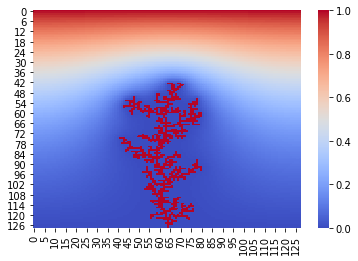

In [57]:
#visualize output from c
mat = []
for fn in sorted(os.listdir('output')):
    lines = open(os.path.join('output', fn), 'r').readlines()
    for line in lines:
#         print(line.split('\t')[:-1])
        mat.append([float(tmp) for tmp in line.split('\t')[:-1]])

ax = sns.heatmap(mat, cmap='coolwarm')
plt.savefig('destination_path.eps', format='eps')